# 问题二的分析

对于没有信誉评级、是否违约记录的企业，需要根据已有信贷记录的企业的相关数据，建立这些数
据与信誉评级、是否违约的关系，进而给出信誉评级、是否违约预测模型。

为了评价模型的准确性，随机取有信贷记录的企业中的 80%的企业作为训练集，即其余 20%作为测
试集。分别对训练集中企业的信誉评级、是否违约两个变量与其对应影响因素(模型一中得到)建立分类模
型：Logistic 回归模型、决策树模型、Bayes 判别模型、Fisher 判别等，并将各模型代入测试集验证，选
择正确率最高的模型预测无信贷记录企业的信誉评级、是否违约。

最后基于问题一的模型，带入预测的
信誉评级、是否违约数据，给出这些企业的贷款额度得分、利率。特别，对于企业信誉评级为 D 的企业
不予贷款，企业贷款额度得分与利率为 0。由于该银行在年度信贷总额为 1 亿元，可以通过计算每个企
业的贷款额度比例，进而给出银行在年度信贷总额为 1 亿元时的贷款额度得分。

## 先根据问题一中分析过后得出的一系列影响因素对模型所需input进行data preparation

### 企业级别的量化
将信誉评级以此标准进行量化处理，信誉评级为 A 的企业得分为 4，信誉评级为 B 的企业得分为 3，
信誉评级为 C 的企业得分为 2，信誉评级为 D 的企业得分为 1。

### 是否违约的量化
将没有违约行为的企业记为 0，有违约行为的企业记为 1。

In [18]:

# 读取 附件1：123家有信贷记录企业的相关数据.xlsx
# 1. 读取数据:附件1：123家有信贷记录企业的相关数据.xlsx，保存为dataframe格式
# 2. 读取信誉评级列，将信誉评级以此标准进行量化处理，信誉评级为 A 的企业得分为 4，信誉评级为 B 的企业得分为 3，信誉评级为 C 的企业得分为 2，信誉评级为 D 的企业得分为 1。
# 3. 读取违约行为列，将违约行为以此标准进行量化处理，违约行为为是的企业得分为 1，违约行为为否的企业得分为 0。
# Read the Excel file

import pandas as pd
# Import the excel file and call it xls_file
excel_file = pd.ExcelFile("C:/Users/lenovo/Desktop/CUMCM/历年真题/2020/2020C/附件1：123家有信贷记录企业的相关数据.xlsx")
# View the excel_file's sheet names
print(excel_file.sheet_names)
# Load the excel_file's Sheet1 as a dataframe
df1 = excel_file.parse('企业信息')
print(df1)

# Quantize the '信誉评级' column
df1['信誉评级'] = df1['信誉评级'].map({'A': 4, 'B': 3, 'C': 2, 'D': 1})

# Quantize the '违约行为' column
df1['是否违约'] = df1['是否违约'].map({'是': 1, '否': 0})
print(df1)

['企业信息', '进项发票信息', '销项发票信息']
     企业代号                 企业名称 信誉评级 是否违约
0      E1          ***电器销售有限公司    A    否
1      E2          ***技术有限责任公司    A    否
2      E3  ***电子(中国)有限公司***分公司    C    否
3      E4          ***发展有限责任公司    C    否
4      E5         ***供应链管理有限公司    B    否
..    ...                  ...  ...  ...
118  E119                ***药房    D    是
119  E120          ***陈列广告有限公司    D    是
120  E121     ***药业连锁有限公司***药店    D    是
121  E122          ***商贸有限责任公司    D    是
122  E123         ***创科技有限责任公司    D    是

[123 rows x 4 columns]
     企业代号                 企业名称  信誉评级  是否违约
0      E1          ***电器销售有限公司     4     0
1      E2          ***技术有限责任公司     4     0
2      E3  ***电子(中国)有限公司***分公司     2     0
3      E4          ***发展有限责任公司     2     0
4      E5         ***供应链管理有限公司     3     0
..    ...                  ...   ...   ...
118  E119                ***药房     1     1
119  E120          ***陈列广告有限公司     1     1
120  E121     ***药业连锁有限公司***药店     1     1
121  E122          ***商贸有

In [ ]:
df2 = excel_file.parse('进项发票信息')
df3 = excel_file.parse('销项发票信息')

In [20]:
print(df2.columns)
print(df3.columns)

Index(['企业代号', '发票号码', '开票日期', '销方单位代号', '金额', '税额', '价税合计', '发票状态'], dtype='object')
Index(['企业代号', '发票号码', '开票日期', '购方单位代号', '金额', '税额', '价税合计', '发票状态'], dtype='object')


In [32]:
import pandas as pd
df = pd.DataFrame()
# total_sales_tax =
# total_input_tax =
# company_sales_tax =
# average_sales_tax =
# company_invoices =
# total_invoices =
# 依据Index(['企业代号', '发票号码', '开票日期', '销方单位代号', '金额', '税额', '价税合计', '发票状态'], dtype='object')Index(['企业代号', '发票号码', '开票日期', '购方单位代号', '金额', '税额', '价税合计', '发票状态'], dtype='object')计算每个企业的上述6个指标
# Calculate the six indicators for each company
df['total_sales_tax'] = df2.groupby('企业代号')['税额'].sum()
df['total_input_tax'] = df3.groupby('企业代号')['税额'].sum()
df['company_sales_tax'] = df2.groupby('企业代号')['税额'].sum()
df['average_sales_tax'] = df2.groupby('企业代号')['税额'].mean()
df['company_invoices'] = df2.groupby('企业代号')['发票号码'].count()
df['total_invoices'] = df2['发票号码'].nunique()

# Calculate the increase rate
df['increase_rate'] = df['total_sales_tax'] - df['total_input_tax']

# Calculate the cash flow ratio
df['cash_flow_ratio'] = df['company_sales_tax'] / df['average_sales_tax']

# Calculate the invoice rate
df['invoice_rate'] = df['company_invoices'] / df['total_invoices']

# # Calculate the scores
# df['scores'] = df.apply(lambda row: calculate_score(row['increase_rate'], row['cash_flow_ratio'], row['invoice_rate']), axis=1)

# Print the updated dataframe
print(df['invoice_rate'])
print(df)

企业代号
E1      0.016411
E10     0.019540
E100    0.000277
E101    0.000076
E102    0.003482
          ...   
E95     0.000019
E96     0.000052
E97     0.000043
E98     0.000243
E99     0.004197
Name: invoice_rate, Length: 123, dtype: float64
      total_sales_tax  total_input_tax  company_sales_tax  average_sales_tax  \
企业代号                                                                           
E1       9.286665e+08     6.458183e+08       9.286665e+08      269882.725539   
E10      3.211833e+05     1.162354e+07       3.211833e+05          78.394757   
E100     2.254220e+03     2.072300e+04       2.254220e+03          38.865862   
E101     7.256230e+03     9.707743e+04       7.256230e+03         453.514375   
E102     4.867765e+05     6.178255e+04       4.867765e+05         666.817082   
...               ...              ...                ...                ...   
E95      6.442000e+01     7.362057e+04       6.442000e+01          16.105000   
E96      1.164686e+05     4.781277e+04  

In [25]:
print(df2['企业代号'])

0           E1
1           E1
2           E1
3           E1
4           E1
          ... 
210942    E122
210943    E122
210944    E123
210945    E123
210946    E123
Name: 企业代号, Length: 210947, dtype: object


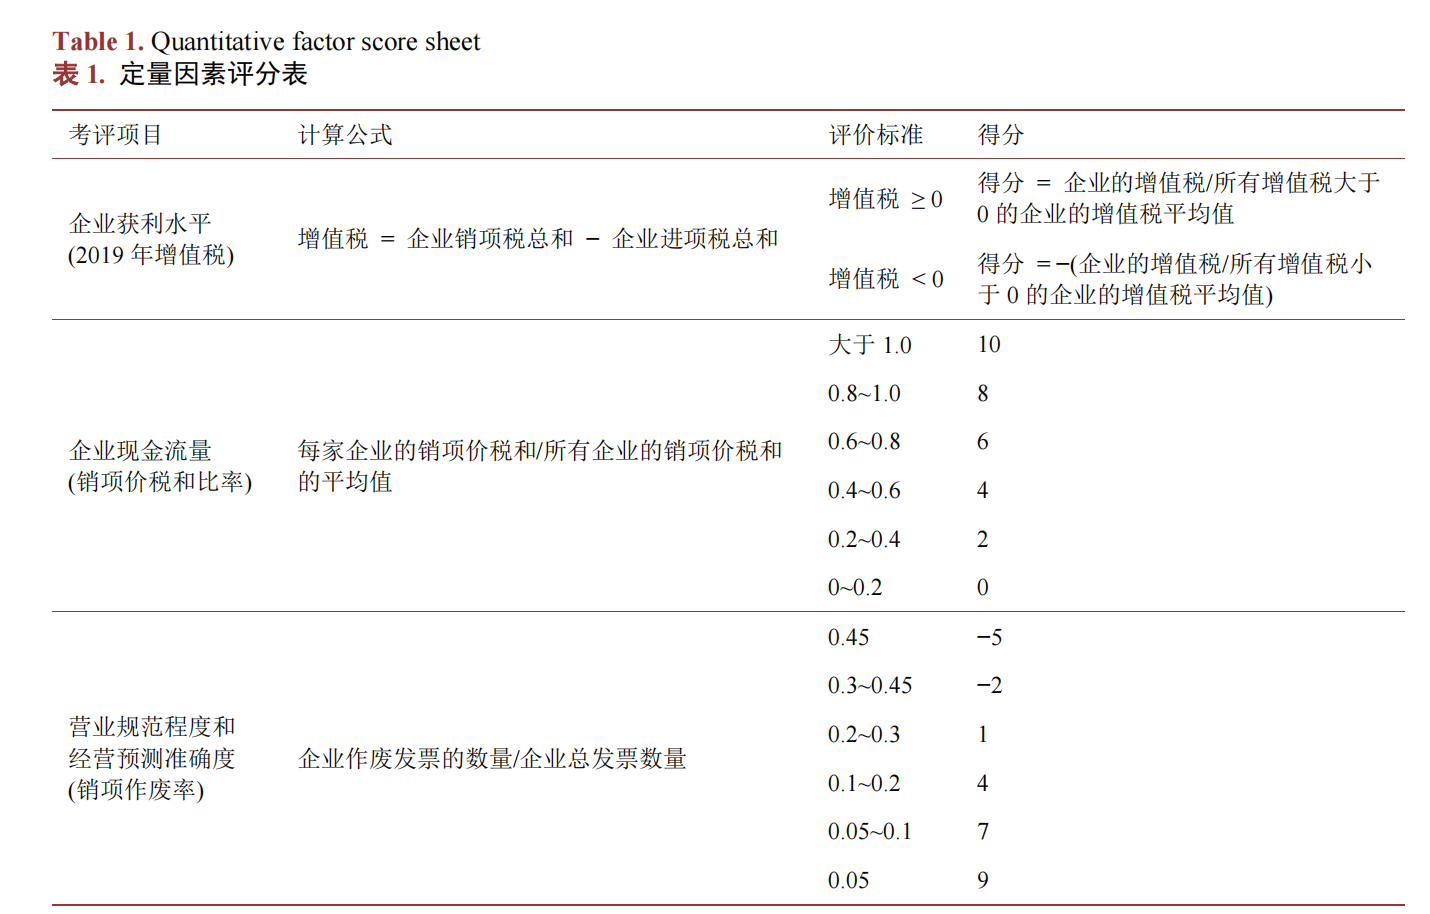

In [40]:
import pandas as pd
import numpy as np

# 假设df是已经存在的DataFrame，且包含'invoice_tax'这一列，表示增值税
# ...

# 计算增值税大于0的企业的增值税平均值
avg_invoice_tax_positive = df[df['increase_rate'] > 0]['increase_rate'].mean()

# 计算增值税小于0的企业的增值税平均值（排除增值税为0的企业）
avg_invoice_tax_negative = df[(df['increase_rate'] < 0) & (df['increase_rate'] != 0)]['increase_rate'].mean()

# 定义一个函数来计算得分
def calculate_score(invoice_tax, avg_positive, avg_negative):
    if pd.notna(invoice_tax):  # 确保增值税值不是NaN
        if invoice_tax > 0:
            return invoice_tax / avg_positive
        elif invoice_tax < 0:
            return -(invoice_tax / avg_negative)
        else:
            return 0  # 如果增值税为0，得分也为0（或你可以决定如何处理这种情况）
    else:
        return np.nan  # 如果增值税是NaN，返回NaN作为得分

# 应用函数到DataFrame以计算得分

df['score_invoice_tax'] = df['increase_rate'].apply(lambda x: calculate_score(x, avg_invoice_tax_positive, avg_invoice_tax_negative))

# 打印更新后的df
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
# 打印更新后的df
    print(df)

      total_sales_tax  total_input_tax  company_sales_tax  average_sales_tax  \
企业代号                                                                           
E1          9.287e+08        6.458e+08          9.287e+08         269882.726   
E10         3.212e+05        1.162e+07          3.212e+05             78.395   
E100        2.254e+03        2.072e+04          2.254e+03             38.866   
E101        7.256e+03        9.708e+04          7.256e+03            453.514   
E102        4.868e+05        6.178e+04          4.868e+05            666.817   
E103        5.732e+04        1.459e+05          5.732e+04            333.268   
E104        1.585e+01        8.462e+03          1.585e+01             15.850   
E105        1.043e+03        2.824e+04          1.043e+03            173.847   
E106        2.388e+03        1.929e+04          2.388e+03             66.333   
E107        6.273e+03        5.318e+04          6.273e+03            696.958   
E108        6.926e+03        5.744e+03  

In [41]:
import pandas as pd
import numpy as np

def calculate_score(cash_flow_ratio, invoice_rate):
    # ...（省略了increase_rate的计算，因为它没有变化）

    # Calculate the score for the cash flow ratio
    score_cash_flow = np.zeros_like(cash_flow_ratio)
    score_cash_flow[cash_flow_ratio > 1.0] = 10
    score_cash_flow[(0.8 <= cash_flow_ratio) & (cash_flow_ratio <= 1.0)] = 8
    score_cash_flow[(0.6 <= cash_flow_ratio) & (cash_flow_ratio < 0.8)] = 6
    score_cash_flow[(0.4 <= cash_flow_ratio) & (cash_flow_ratio < 0.6)] = 4
    score_cash_flow[(0.2 <= cash_flow_ratio) & (cash_flow_ratio < 0.4)] = 2

    # Calculate the score for the invoice rate
    score_invoice_rate = np.zeros_like(invoice_rate)
    score_invoice_rate[invoice_rate >= 0.45] = -5
    score_invoice_rate[(0.3 <= invoice_rate) & (invoice_rate < 0.45)] = -2
    score_invoice_rate[(0.2 <= invoice_rate) & (invoice_rate < 0.3)] = 1
    score_invoice_rate[(0.1 <= invoice_rate) & (invoice_rate < 0.2)] = 4
    score_invoice_rate[(0.05 <= invoice_rate) & (invoice_rate < 0.1)] = 7
    score_invoice_rate[invoice_rate < 0.05] = 9

    return score_cash_flow, score_invoice_rate  # 不返回increase_rate

# 假设df已经是一个Pandas DataFrame，并且包含所需的列
# ...



# 使用numpy.vectorize不是必要的，因为我们已经手动进行了矢量化
df['score_cash_flow'], df['score_invoice_rate'] = calculate_score(df['cash_flow_ratio'].values, df['invoice_rate'].values)

# 如果需要增加increase_rate列（尽管它没有变化）
# df['score_increase_rate'] = df['increase_rate']
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
# 打印更新后的df
    print(df)

      total_sales_tax  total_input_tax  company_sales_tax  average_sales_tax  \
企业代号                                                                           
E1          9.287e+08        6.458e+08          9.287e+08         269882.726   
E10         3.212e+05        1.162e+07          3.212e+05             78.395   
E100        2.254e+03        2.072e+04          2.254e+03             38.866   
E101        7.256e+03        9.708e+04          7.256e+03            453.514   
E102        4.868e+05        6.178e+04          4.868e+05            666.817   
E103        5.732e+04        1.459e+05          5.732e+04            333.268   
E104        1.585e+01        8.462e+03          1.585e+01             15.850   
E105        1.043e+03        2.824e+04          1.043e+03            173.847   
E106        2.388e+03        1.929e+04          2.388e+03             66.333   
E107        6.273e+03        5.318e+04          6.273e+03            696.958   
E108        6.926e+03        5.744e+03  

审查信用违约的方法是 C5.0 (CRT)算法，由 J. Ross Quinlan 创建。该算法用于生成决策树。C5.0 算
法在评估缺省值方面有很大的优势，例如可以在没有数学背景的情况下对结果进行解释，并且可以用于
小数据集或大数据集[9]。利用 R 软件中“C50”packages，可以对数据进行拆分，决策树可以持续增长。
考虑决策树的修剪，由于决策树的目的是深入了解数据，而在让决策树增长到最佳大小之前对其进行预
修剪可能会错过重要的模式。因此，选择将决策树深度最大化后进行修剪。

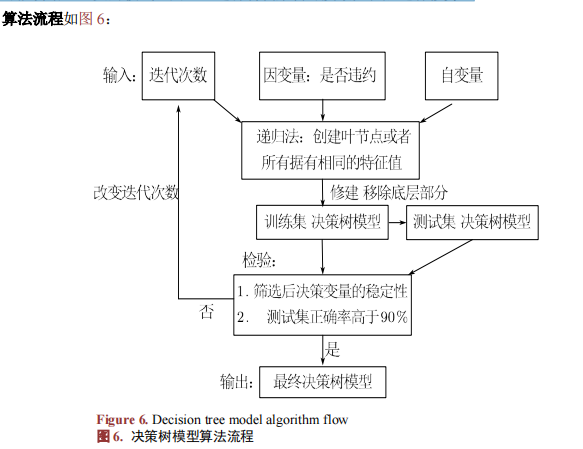

### 基于 Fisher 多分类模型的信誉评级

Step 1：对于 Fisher 多分类模型，通过引入全局散度矩阵 Sb，可测得测试集企业的实力 Y1、信贷风
险 Y2、违约行为 Y3的散度矩阵 St：

Step 2：为了使样本向量投影到确定的类别，并使得投影下与同类中心的距离尽可能的小，与异类中
心距离尽可能地大。则计算投影矩阵 W，并解决以下优化目标： 

Step 3：加入拉格朗日乘子并求导，可推导出：得到投影矩阵 W，可以达到分类的目的。

In [ ]:
import pandas as pd
import numpy as np

# df = pd.DataFrame
# Step 1: Calculate the global scatter matrix St
Y1 = df4['实力'].values
Y2 = df4['信贷风险'].values
Y3 = df4['违约行为'].values

St = np.cov(np.vstack((Y1, Y2, Y3)))

# Step 2: Calculate the projection matrix W
Sw = np.zeros_like(St)
Sb = np.zeros_like(St)

# Calculate the within-class scatter matrix Sw
for i in range(num_classes):
    class_samples = df[df4['信誉评级'] == i+1][['实力', '信贷风险', '违约行为']].values
    class_mean = np.mean(class_samples, axis=0)
    class_samples_centered = class_samples - class_mean
    Sw += np.dot(class_samples_centered.T, class_samples_centered)

# Calculate the between-class scatter matrix Sb
overall_mean = np.mean(df[['实力', '信贷风险', '违约行为']].values, axis=0)
for i in range(num_classes):
    class_samples = df[df4['信誉评级'] == i+1][['实力', '信贷风险', '违约行为']].values
    class_mean = np.mean(class_samples, axis=0)
    class_mean_diff = class_mean - overall_mean
    Sb += len(class_samples) * np.outer(class_mean_diff, class_mean_diff)

# Step 3: Calculate the projection matrix W
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) @ Sb)
W = eigenvectors[:, :num_classes-1]

# Apply the projection matrix to the data
X = df[['实力', '信贷风险', '违约行为']].values
X_fisher = X @ W

# Perform classification using the Fisher model
# ...